# PCA 

1) covariance Matrix 
2) eigen value 
3) eigen vector

In [5]:
import numpy as np
import matplotlib.pyplot as plt 

In [6]:
# Sample Data 
X = [[1,2],[3,3],[3,5],[5,4],[5,6],[6,5],[8,7],[9,8]]

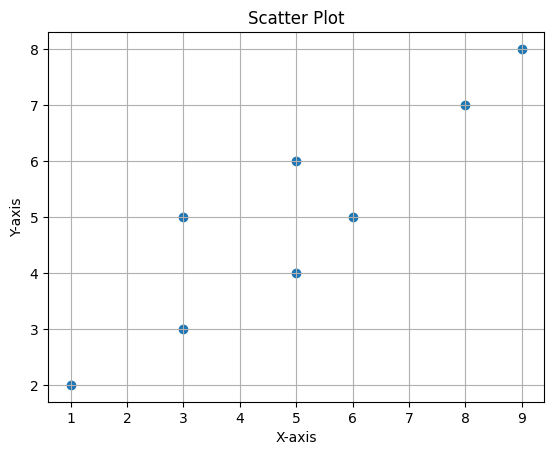

In [8]:
# Show Scatter

# Extracting x and y coordinates
x_coords = [point[0] for point in X]
y_coords = [point[1] for point in X]

# Create scatter plot
plt.scatter(x_coords, y_coords)

# Adding labels and title

plt.grid(True)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show plot
plt.show()

# Covariance Matrix

- equation : Σ

In [35]:
X_ = np.asanyarray(X)

In [36]:
X_.shape

(8, 2)

In [46]:
means_= np.asanyarray( [np.mean(X_[:,i]) for i in range(X_.shape[1])] ) 

In [47]:
means_

array([5., 5.])

In [48]:
tmp_ = np.asanyarray( [X_[:,i] - means_[i] for i in range(X_.shape[1])] )

In [49]:
tmp_.shape

(2, 8)

In [50]:
a = tmp_ @ np.transpose(tmp_) 

In [51]:
a.shape

(2, 2)

In [52]:
a_ = a / X_.shape[0] 

In [53]:
a_

array([[6.25, 4.25],
       [4.25, 3.5 ]])

# Eigen Value 

- equation : - A⋅v=λ⋅v
- 위의 공식의 A를 공분산 행렬로 두고 정리하면은 
- Σ⋅v = λ⋅v
  => Σ⋅v - λ⋅v = 0   
  => (Σ-λ) ⋅ v = 0  
  (A*B =0 에서) v 가 0이 아니라면  
  => Σ-λ⋅I = 0 

  => determinant of (Σ-λ⋅I)  
     ref: ad-bc   
    = (a-lambda)(d-lambda) - b⋅c = 0 

  => 위의 lambda 에 대한 2차 방정식을 풀면은 dimension 만큼의 고유값(λ)들을 얻을 수 있다.   
  => 다시, 고유값 벡터에 대한 정의로 돌아가서 λ 값들을 아래의 공식에 대입해서 고유값 벡터 (v) 들을 구해주면 된다.   
  => Σ⋅v - λ⋅v = 0 

In [55]:
sigma_= a_ 
sigma_.shape

(2, 2)

In [75]:
a = sigma_[0][0]
b = sigma_[0][1]
c = sigma_[1][0]
d = sigma_[1][1]

In [91]:
# variable declaration

import sympy as sy 

lambda_ = sy.symbols('lambda1')

In [167]:
sigma_

array([[6.25, 4.25],
       [4.25, 3.5 ]])

In [168]:
sy_sigma = sy.Matrix(sigma_)

In [170]:
sy_sigma.eigenvals()

{9.34189209630141: 1, 0.408107903698591: 1}

In [172]:
# eigen vector 결과값 lib 으로 확인, 아래에서 raw function 으로 재전개 
sy_sigma.eigenvects()

[(9.34189209630141,
  1,
  [Matrix([
   [0.808647106411277],
   [ 0.58829402282589]])]),
 (0.408107903698591,
  1,
  [Matrix([
   [-0.58829402282589],
   [0.808647106411277]])])]

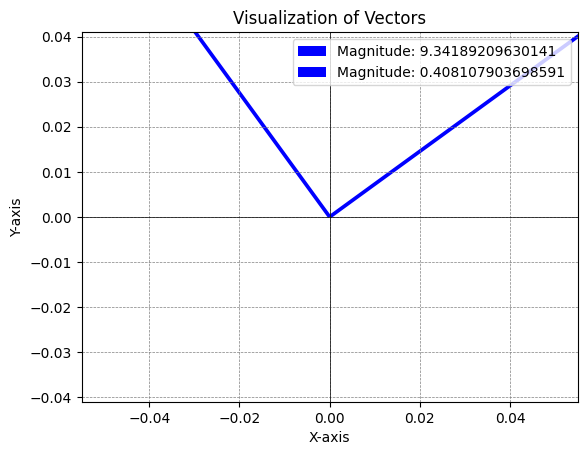

In [191]:
import matplotlib.pyplot as plt
from sympy import Matrix

vectors = [
    (9.34189209630141, 1, Matrix([[0.808647106411277], [0.58829402282589]])),
    (0.408107903698591, 1, Matrix([[-0.58829402282589], [0.808647106411277]]))
]

# Plotting each vector
for magnitude, _, vector in vectors:
    x, y = float(vector[0]), float(vector[1])
    plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color='b', label=f"Magnitude: {magnitude}")

# Setting up plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Visualization of Vectors')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

# Show plot
plt.axis('equal')
plt.show()


In [98]:
# polynomial(quadratic equation)
f_1 =  (a - lambda_)*(d - lambda_) - b*c 

# expand the polynomial 
f_1_c = sy.expand(f_1)
f_1_c

lambda1**2 - 9.75*lambda1 + 3.8125

In [99]:
# solve the equation

s   = sy.Eq(f_1_c,0)
ans = sy.solve(s)

In [101]:
ans

[0.408107903698591, 9.34189209630141]

In [111]:
ans_ = sorted(ans,reverse=True)

In [174]:
ans_

[9.34189209630141, 0.408107903698591]

In [178]:
x,y = sy.Symbol('x'), sy.Symbol('y')

In [186]:
f1 = 6.25*x + 4.25*y - 9.34*x

In [182]:
f2 = 4.25*x + 3.5*y -  9.34*y

In [183]:
f1

-3.09*x + 4.25*y

In [184]:
f2

4.25*x - 5.84*y

In [190]:
sy.solve([-1*3.09* x+4.25* y,4.25*x-1*5.84*y], [x,y])

{x: 0.0, y: 0.0}

In [120]:
# Σ⋅v - λ⋅v = 0

# Sympy 선형대수 연산 사용
# A.LUsolve(b)

#v11,v12,v21,v22 = sy.symbols('v11','v12','v21','v22')
v11,v12,v21,v22 = sy.symbols('v11'), sy.symbols('v12'),sy.symbols('v21'),sy.symbols('v22') 

v1 = sy.Matrix( [v11,v12 ])
v2 = sy.Matrix( [v21,v22 ])

In [121]:
v1

Matrix([
[v11],
[v12]])

In [123]:
v2

Matrix([
[v21],
[v22]])

In [129]:
sigma_v1 = sigma_ * v1
sigma_ * v1

Matrix([
[6.25*v11 + 4.25*v12],
[ 4.25*v11 + 3.5*v12]])

In [132]:
sigma_v1.shape, v2.shape

((2, 1), (2, 1))

In [136]:
ans_lambda_1 = ans_[0]
lambda_v1 = ans_lambda_1 * v1
lambda_v1

Matrix([
[9.34189209630141*v11],
[9.34189209630141*v12]])

In [155]:
sigma_v1[0]

6.25*v11 + 4.25*v12

In [156]:
lambda_v1[0]

9.34189209630141*v11

In [164]:
solv0 = sigma_v1[0] - lambda_v1[0]
solv0 

-3.09189209630141*v11 + 4.25*v12

In [157]:
sigma_v1[1]

4.25*v11 + 3.5*v12

In [163]:
lambda_v1[1]

9.34189209630141*v12

In [165]:
solv1 = sigma_v1[1] - lambda_v1[1]
solv1 

4.25*v11 - 5.84189209630141*v12

In [166]:
sy.solve( [solv0, solv1],[ v11,v12 ])

{v11: 0.0, v12: 0.0}

In [142]:
ques = sigma_v1 - lambda_v1
ques

Matrix([
[-3.09189209630141*v11 + 4.25*v12],
[ 4.25*v11 - 5.84189209630141*v12]])

In [147]:
ques[0]

-3.09189209630141*v11 + 4.25*v12

In [144]:
# 연립방정식 풀기 

In [148]:
sy.solve([ques[0],ques[1] ],[v11,v12])

{v11: 0.0, v12: 0.0}